<font style='font-size:1.5em'>**🧑‍🏫 Week 05 Lecture – The Group → Apply → Combine strategy and Data Visualisation** </font>

<font style='font-size:1.2em'>LSE [DS105A](https://lse-dsi.github.io/DS105/autumn-term/index.html){style="color:#e26a4f;font-weight:bold"} – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 31 October 2024 

⌚ **TIME:** 16.00-18.00

📍 **LOCATION:** CLM.5.02
</div>🎃


**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io){style="color:#e26a4f;font-weight:bold"}

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi){style="color:#e26a4f;font-weight:bold"}

**OBJECTIVE**: The building blocks of the grammar-of-graphics approach to data visualisation.

**REFERENCES:**

- 🌐 [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html){style="color:#e26a4f;font-weight:bold"}
- 📖 [Official pandas documentation](https://pandas.pydata.org/docs/reference/index.html){style="color:#e26a4f;font-weight:bold"}

---

--- 

**⚙️ The setup**

We will use the following libraries today:

In [1]:
import os
import json
import datetime

import pandas as pd
from lets_plot import *
LetsPlot.setup_html()


Read an existing dataset:

In [3]:
df_reddit = pd.read_csv('../data/reddit_posts.csv')

In [4]:
df_reddit['created_utc'] = df_reddit['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [5]:
# After look at dtypes, take a look at the max and min of each int64 column
# Either manually: df_reddit['ups'].max()
# Or in aggregate: 

int_cols = df_reddit.select_dtypes(include=['int64']).columns
df_reddit[int_cols].describe()

,ups,downs,score,subreddit_subscribers,num_comments
count,200.000000,200.0,200.000000,2.000000e+02,200.000000
mean,4753.415000,0.0,4753.415000,3.066587e+07,597.425000
std,7124.715772,0.0,7124.715772,9.549556e+06,1331.908396
min,752.000000,0.0,752.000000,1.363286e+07,6.000000
25%,1309.500000,0.0,1309.500000,2.280827e+07,75.750000
50%,2343.500000,0.0,2343.500000,3.027790e+07,187.000000
75%,4816.250000,0.0,4816.250000,3.486540e+07,540.250000
max,70187.000000,0.0,70187.000000,5.409433e+07,11012.000000


#  Plots are made of layers!

We will use the creation of a barplot to illustrate how the grammar of graphics works. You can read more about it in the references below:
- ["The Layered Grammar of Graphics"](http://vita.had.co.nz/papers/layered-grammar.pdf)
- [R for Data Science, Chapter 3: Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)

![Screenshot 2023-11-08 at 16.56.12.png](<attachment:Screenshot 2023-11-08 at 16.56.12.png>)

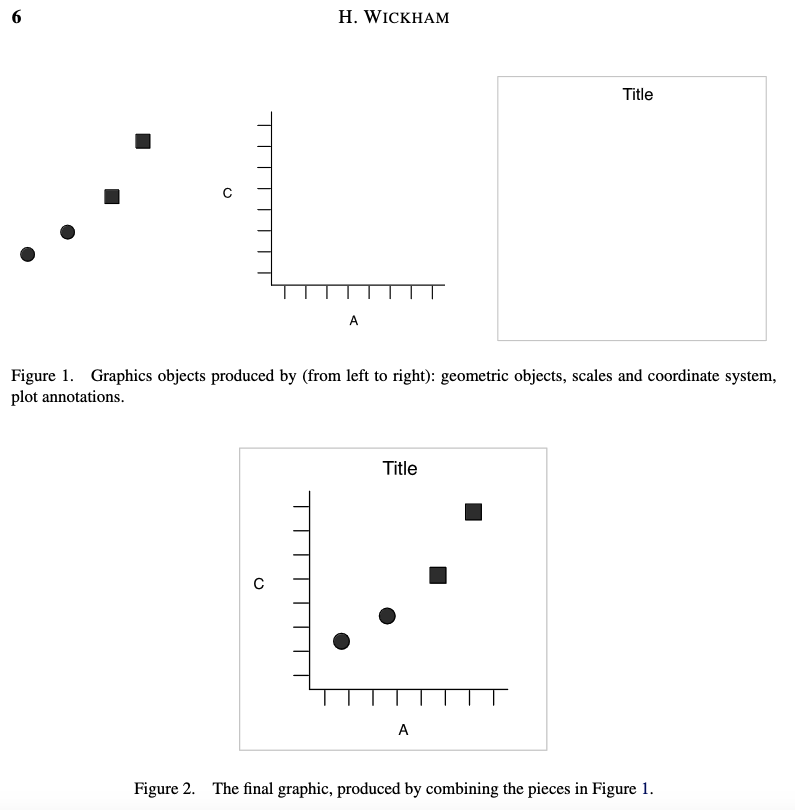

## How to create a barplot with `lets-plot`?

Let's use these principles to build all the layers of a barplot. We will use the `plotnine` package, a Python implementation of the `ggplot2` package in R.

Say we want to convert the summarised data below into a barplot:

In [55]:
df_reddit['subreddit_name_prefixed'].value_counts().head()

r/news             20
r/worldnews        18
r/todayilearned    16
r/funny            14
r/aww              14
Name: subreddit_name_prefixed, dtype: int64

First of all, we need to convert the result above to a DataFrame (we can't work with a Series):


In [7]:
# Let's stablish the practice of creating a new dataframe for each plot
# This way, we avoid modifying the original dataframe by accident
plot_df = df_reddit['subreddit_name_prefixed'].value_counts().to_frame().reset_index()
plot_df.head()

,subreddit_name_prefixed,count
0,r/news,20
1,r/worldnews,18
2,r/todayilearned,16
3,r/funny,14
4,r/aww,14


Ops. I have to fix the column names:


In [8]:
plot_df.columns = ['subreddit', 'count']

Now think about the **mapping** of the coordinates of the plot:

**What goes in the X axis?** The `subreddit_name_prefixed` column.

**What goes in the Y axis?** The `count` column.

We specify this mapping by using the `aes()` function (which stands for "aesthetics"):

In [12]:
#This is how you specify the axis
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    geom_bar()
)

g

The Y-axis is a bit weird. Everything is 1?!?

We need to indicate to the plot that we want to **sum** the values of the `count` column, not whether they exist or not. We do this by using the `stat` argument in the `geom_bar()` function:

In [13]:
#This is how you specify the axis
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    geom_bar(stat='identity')
)

g

### You can customise axes!

Axes, just like colours, are **scales** of the plot. We can customise them with the `scale_*_*` functions, where the first `*` is the type of scale (e.g. in case of axes,`scale_x` or `scale_y`) and the second `*` is the type of scale (e.g. `scale_x_continuous`, if the scale is a continous numerical scale).

In [14]:
#Let's change the title of the count axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts") +  # Change the Y-axis before flipping it
    geom_bar(stat='identity')
)

g

In [21]:
# We could choose to change the labels of that axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    geom_bar(stat='identity')
)

g

🗣️ **CLASSROOM DISCUSSION:** Why do you think we had to do `range(0, 20+2, 2)`? Why not just `range(0, 20)`?

I could flip it:

In [24]:
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity')
)

# This is a little bit more useful but hard to read because there is no order
g

### Add in more aesthetics

Each `geom` 'listens' to a specific set of aesthetics. 

If you go to the [documentation of the `geom_bar()` function](https://lets-plot.org/python/pages/api/lets_plot.geom_bar.html#lets_plot.geom_bar), you will see that the `x` and `y` aesthetics are mandatory, but there are others which are optional.


In [28]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity', fill='red') + # THIS IS THE IMPORTANT BIT
    theme_minimal() +
    labs(title="I could fix the colour used to fill the bars!")
)

g

### Who said you MUST stick to a single `geom`?

Let's add a `geom_text()` to show the actual values of the bars:

In [34]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count", fill="count", label="count")) + # I added a label aesthetic here
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity') + 
    geom_text(mapping=aes(y="count"), nudge_y=4, size=8) + # THIS IS THE IMPORTANT BIT. Notice how I redefined the y-axis just for the text
    theme_minimal() +
    labs(title="OR, I could map the fill to a column (count)!",
         subtitle="Because count is a numerical variable, plotnine automatically converts it to a gradient scale",)
)

g